In [9]:
import pandas as pd
import numpy as np
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "D:/SKILL/dataset/"
crabs_data = pd.read_csv(path+'crabs.csv', index_col=[2])
crabs_data.head()

,sp,sex,FL,RW,CL,CW,BD
index,,,,,,,
1,B,M,8.1,6.7,16.1,19.0,7.0
2,B,M,8.8,7.7,18.1,20.8,7.4
3,B,M,9.2,7.8,19.0,22.4,7.7
4,B,M,9.6,7.9,20.1,23.1,8.2
5,B,M,9.8,8.0,20.3,23.0,8.2


In [3]:
print(crabs_data.shape)

(200, 7)


In [4]:
print(crabs_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 50
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      200 non-null    object 
 1   sex     200 non-null    object 
 2   FL      200 non-null    float64
 3   RW      200 non-null    float64
 4   CL      200 non-null    float64
 5   CW      200 non-null    float64
 6   BD      200 non-null    float64
dtypes: float64(5), object(2)
memory usage: 12.5+ KB
None


In [5]:
print(f'species = {crabs_data["sp"].unique()}')
print(f'sex = {crabs_data["sex"].unique()}')

species = ['B' 'O']
sex = ['M' 'F']


- **COL0:** Species (sp) => Orange = O; Blue = B
- **COL1:** Sex => Male = M; Female = F
- **COL2:** Index
- **COL3:** Frontal Lobe Width (FL)
- **COL4:** Rear Width (RW)
- **COL5:** Midline of the Carapace (CL)
- **COL6:** Maximum width of the Carapace (CW)
- **COL7:** Depth Body Length (BD)

In [3]:
#rename columns and cells
crabs_data = crabs_data.rename(columns={"sp":"species","FL":"Frontal Lobe","RW":"Rear Width",
                                       "CL":"Carapace Midline","CW":"Max Width","BD":"Body Depth"})
crabs_data["species"].replace({'B': "Blue", 'O': "Orange"},inplace=True) 
crabs_data["sex"].replace({'M': "Male", 'F': "Female"},inplace=True)
crabs_data.head()

,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Max Width,Body Depth
index,,,,,,,
1,Blue,Male,8.1,6.7,16.1,19.0,7.0
2,Blue,Male,8.8,7.7,18.1,20.8,7.4
3,Blue,Male,9.2,7.8,19.0,22.4,7.7
4,Blue,Male,9.6,7.9,20.1,23.1,8.2
5,Blue,Male,9.8,8.0,20.3,23.0,8.2


In [7]:
crabs_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,200,2,Blue,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,200,2,Male,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frontal Lobe,200.0,NaN,NaN,NaN,15.583,3.495,7.2,12.9,15.55,18.05,23.1
Rear Width,200.0,NaN,NaN,NaN,12.738,2.573,6.5,11.0,12.8,14.3,20.2
Carapace Midline,200.0,NaN,NaN,NaN,32.105,7.119,14.7,27.275,32.1,37.225,47.6
Max Width,200.0,NaN,NaN,NaN,36.415,7.872,17.1,31.5,36.8,42.0,54.6
Body Depth,200.0,NaN,NaN,NaN,14.03,3.425,6.1,11.4,13.9,16.6,21.6


In [4]:
crabs_data['class']=crabs_data['species']+crabs_data['sex']
crabs_data.head()

,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Max Width,Body Depth,class
index,,,,,,,,
1,Blue,Male,8.1,6.7,16.1,19.0,7.0,BlueMale
2,Blue,Male,8.8,7.7,18.1,20.8,7.4,BlueMale
3,Blue,Male,9.2,7.8,19.0,22.4,7.7,BlueMale
4,Blue,Male,9.6,7.9,20.1,23.1,8.2,BlueMale
5,Blue,Male,9.8,8.0,20.3,23.0,8.2,BlueMale


In [9]:
crabs_data['class'].value_counts()

class
BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: count, dtype: int64

## Locally Linear Embedding (LLE)

##### note:
- Parameter_1: **(n_neighbors)** number k of neighbors to calculate the locality
- Parameter_2: **(n_components)** value D for the number of target dimensions (D < k − 1)

In [10]:
#for applying LLE, we have to select the features except binary/categorical
features = ["Frontal Lobe","Rear Width","Carapace Midline","Max Width","Body Depth"]
#then we have to ensure that all variables have same range
crabs_scale = crabs_data.copy()
crabs_scale[features]=MinMaxScaler().fit_transform(crabs_data[features])

In [11]:
crabs_scale.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,200,2,Blue,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,200,2,Male,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frontal Lobe,200.0,NaN,NaN,NaN,0.527,0.22,0.0,0.358,0.525,0.682,1.0
Rear Width,200.0,NaN,NaN,NaN,0.455,0.188,0.0,0.328,0.46,0.569,1.0
Carapace Midline,200.0,NaN,NaN,NaN,0.529,0.216,0.0,0.382,0.529,0.685,1.0
Max Width,200.0,NaN,NaN,NaN,0.515,0.21,0.0,0.384,0.525,0.664,1.0
Body Depth,200.0,NaN,NaN,NaN,0.512,0.221,0.0,0.342,0.503,0.677,1.0
class,200,4,BlueMale,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The minimum of all features is 0 and the maximum is 1, which indicates the successful scaling within range (0,1)

In [12]:
LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=15)
crabs_LLE = LLE.fit_transform(crabs_scale[features])
crabs_scale[['LLE_1','LLE_2']]=crabs_LLE
print(f'The Reconstruction Error is: {LLE.reconstruction_error_}')
crabs_scale.head()

The Reconstruction Error is: 2.1530288017261734e-06


,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Max Width,Body Depth,class,LLE_1,LLE_2
index,,,,,,,,,,
1,Blue,Male,0.057,0.015,0.043,0.051,0.058,BlueMale,-0.145,0.061
2,Blue,Male,0.101,0.088,0.103,0.099,0.084,BlueMale,-0.133,0.058
3,Blue,Male,0.126,0.095,0.131,0.141,0.103,BlueMale,-0.127,0.053
4,Blue,Male,0.151,0.102,0.164,0.160,0.135,BlueMale,-0.119,0.028
5,Blue,Male,0.164,0.109,0.170,0.157,0.135,BlueMale,-0.117,0.022


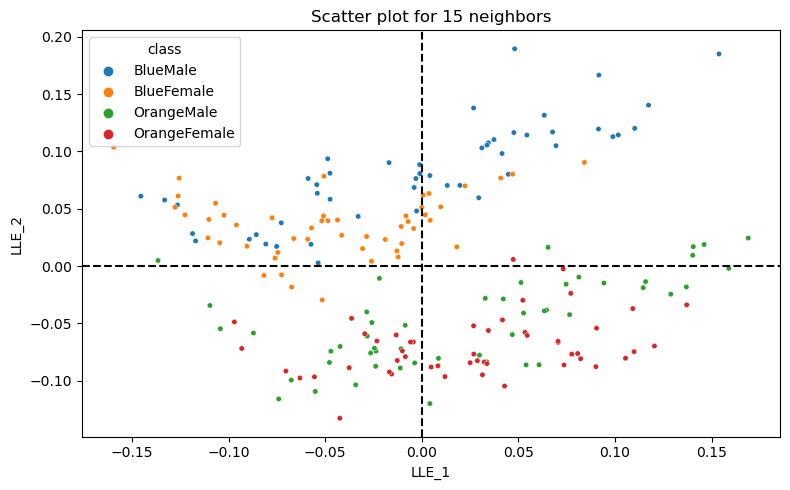

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='LLE_1',y='LLE_2',hue='class',data=crabs_scale,s=15)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.title(f'Scatter plot for 15 neighbors')
plt.tight_layout()
plt.show()

The Reconstruction Error for 20 neighbors is: 1.5812651369601245e-05
The Reconstruction Error for 18 neighbors is: 1.105006337159018e-05
The Reconstruction Error for 12 neighbors is: 3.6769085912386014e-06
The Reconstruction Error for 9 neighbors is: 4.058673980753762e-07
The Reconstruction Error for 6 neighbors is: 2.945190820679143e-08
The Reconstruction Error for 3 neighbors is: 6.699781488366639e-17


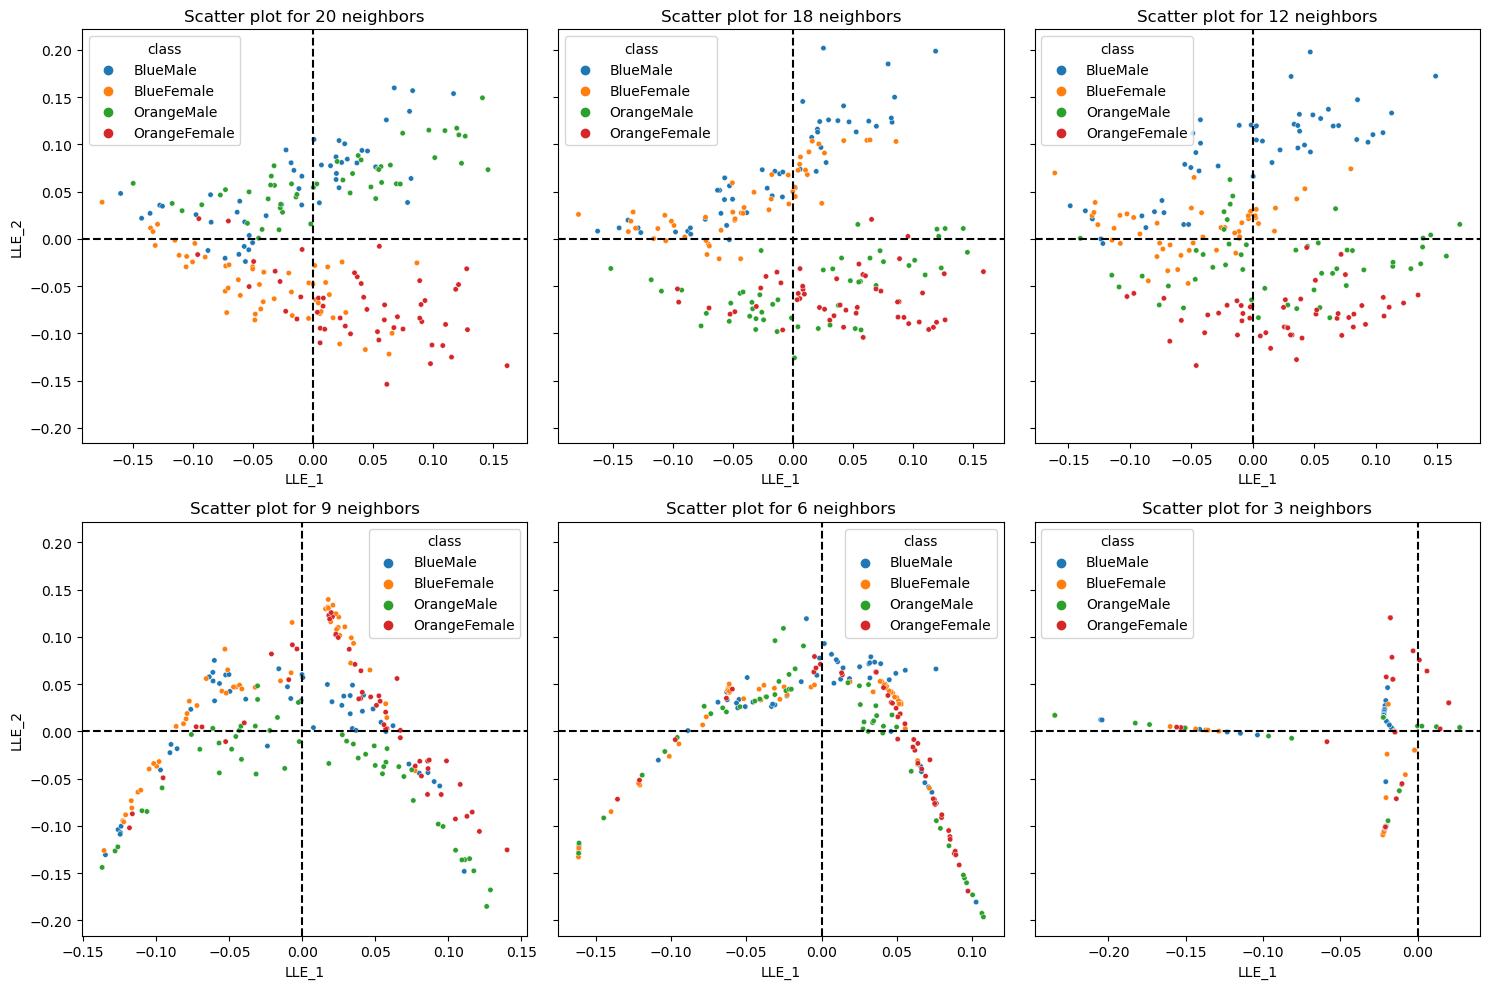

In [14]:
csd = crabs_scale.copy()

def lle(d_val, k_val, data):
    local_lin = LocallyLinearEmbedding(n_components=d_val, n_neighbors=k_val)
    c_lle = local_lin.fit_transform(data)
    csd[['LLE_1', 'LLE_2']] = c_lle
    reconstruction_error = local_lin.reconstruction_error_
    return reconstruction_error

k_val_list = [20,18,12,9,6,3]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)

for i, k_val in enumerate(k_val_list, 1):
    reconstruction_error = lle(d_val=2, k_val=k_val, data=csd[features])
    print(f'The Reconstruction Error for {k_val} neighbors is: {reconstruction_error}')

    ax = axes.flatten()[i-1]
    sns.scatterplot(x='LLE_1', y='LLE_2', hue='class', data=csd, ax=ax,s=15)
    ax.set_title(f'Scatter plot for {k_val} neighbors')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')

plt.tight_layout()
plt.show()

#### LLE for 3 components

In [15]:
LLE_3 = LocallyLinearEmbedding(n_components=3, n_neighbors=15)
crabs_LLE_3 = LLE_3.fit_transform(crabs_scale[features])
crabs_scale[['LLE_1','LLE_2','LLE_3']]=crabs_LLE_3
print(f'The Reconstruction Error is: {LLE.reconstruction_error_}')
crabs_scale.head()

The Reconstruction Error is: 2.1530288017261734e-06


,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Max Width,Body Depth,class,LLE_1,LLE_2,LLE_3
index,,,,,,,,,,,
1,Blue,Male,0.057,0.015,0.043,0.051,0.058,BlueMale,-0.145,0.061,0.093
2,Blue,Male,0.101,0.088,0.103,0.099,0.084,BlueMale,-0.133,0.058,0.059
3,Blue,Male,0.126,0.095,0.131,0.141,0.103,BlueMale,-0.127,0.053,0.053
4,Blue,Male,0.151,0.102,0.164,0.160,0.135,BlueMale,-0.119,0.028,0.060
5,Blue,Male,0.164,0.109,0.170,0.157,0.135,BlueMale,-0.117,0.022,0.060


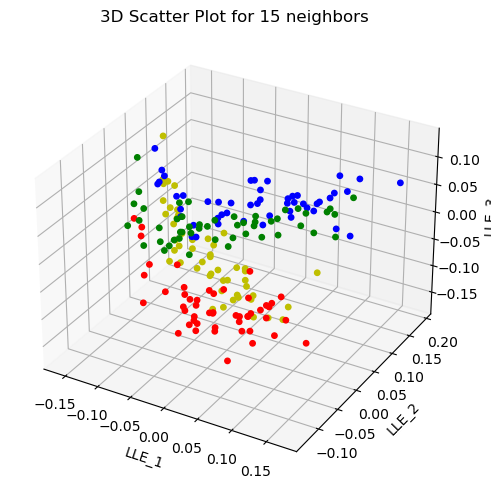

In [16]:
crabs_col = {'BlueMale': 'b', 'BlueFemale': 'y', 'OrangeMale': 'g', 'OrangeFemale': 'r'}

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(crabs_scale.LLE_1, crabs_scale.LLE_2, crabs_scale.LLE_3, c=crabs_scale['class'].map(crabs_col),
           s=15,depthshade=False)
ax.set_xlabel('LLE_1')
ax.set_ylabel('LLE_2')
ax.set_zlabel('LLE_3')
ax.set_title('3D Scatter Plot for 15 neighbors')
plt.tight_layout()
plt.show()

The Reconstruction Error for 20 neighbors is: 4.854234049505499e-05
The Reconstruction Error for 18 neighbors is: 3.133106622617057e-05
The Reconstruction Error for 12 neighbors is: 9.9443692407612e-06
The Reconstruction Error for 9 neighbors is: 4.10679467023365e-06
The Reconstruction Error for 6 neighbors is: 1.6196740114909184e-07
The Reconstruction Error for 3 neighbors is: 1.0049672232549958e-16


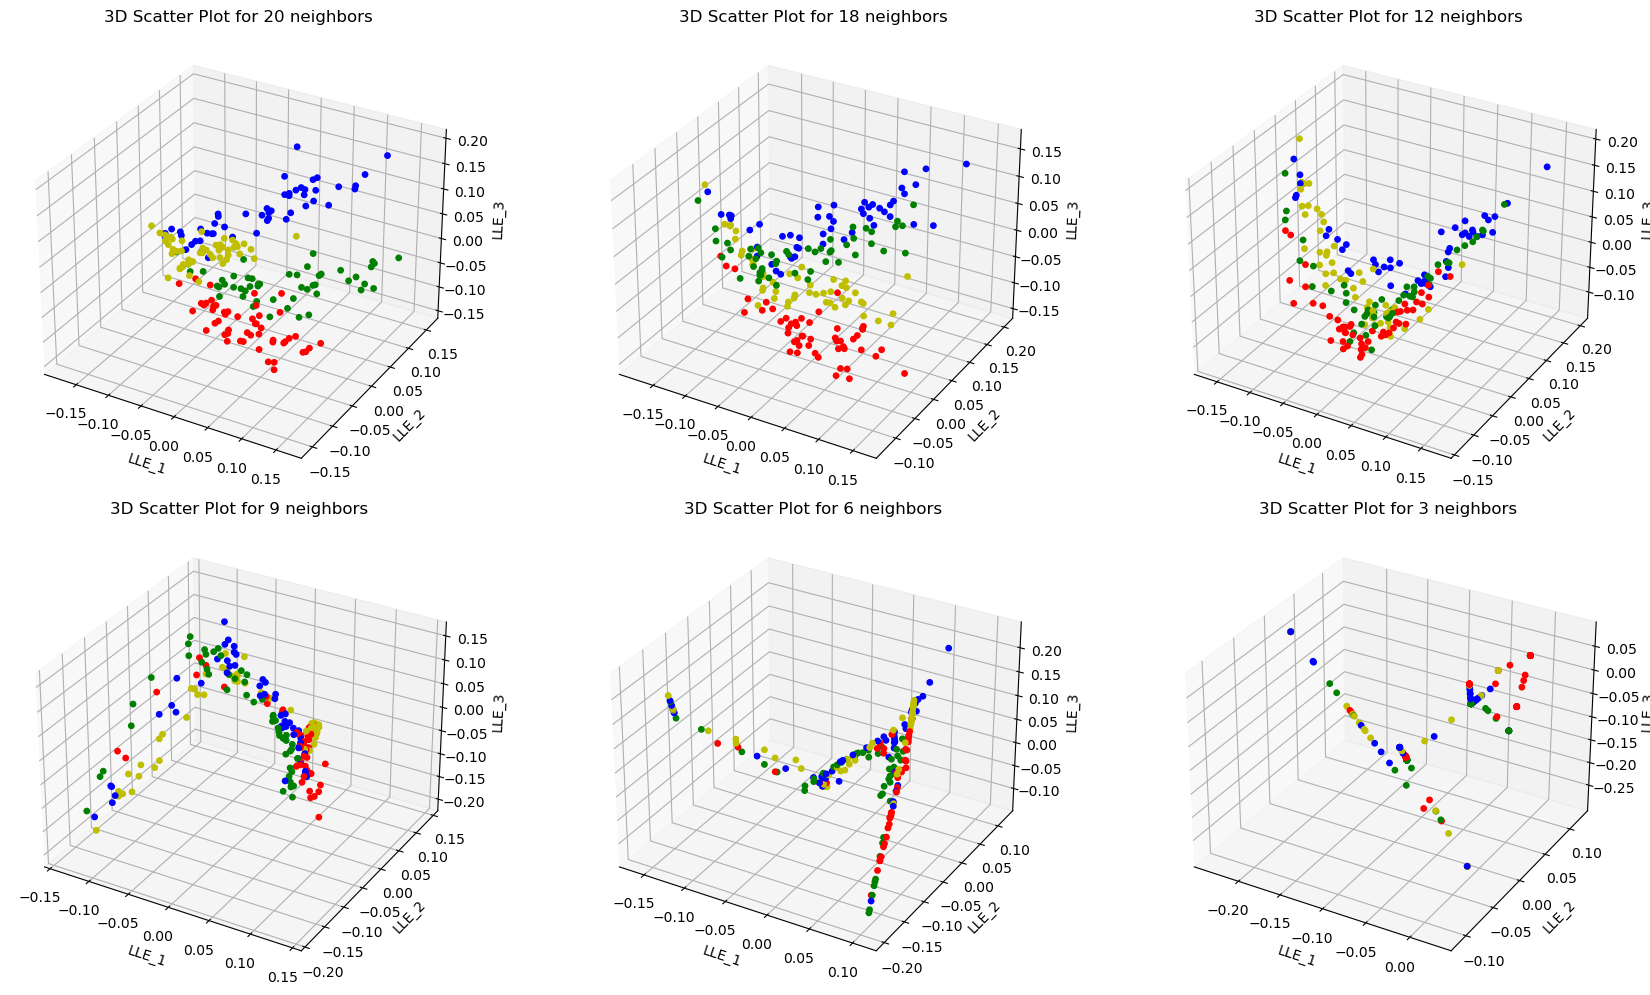

In [17]:
csd_3 = crabs_scale.copy()

def lle(d_val, k_val, data):
    local_lin_3 = LocallyLinearEmbedding(n_components=d_val, n_neighbors=k_val)
    c_lle_3 = local_lin_3.fit_transform(data)
    csd_3[['LLE_1', 'LLE_2', 'LLE_3']] = c_lle_3
    reconstruction_error = local_lin_3.reconstruction_error_
    return reconstruction_error

k_val_list = [20, 18, 12, 9, 6, 3]

crabs_col = {'BlueMale': 'b', 'BlueFemale': 'y', 'OrangeMale': 'g', 'OrangeFemale': 'r'}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), subplot_kw={'projection': '3d'})
axes = axes.flatten()

for i, k_val in enumerate(k_val_list):
    reconstruction_error = lle(d_val=3, k_val=k_val, data=csd_3[features])
    print(f'The Reconstruction Error for {k_val} neighbors is: {reconstruction_error}')

    ax = axes[i]
    ax.scatter(csd_3.LLE_1, csd_3.LLE_2, csd_3.LLE_3,
               c=csd_3['class'].map(crabs_col), s=15, depthshade=False)
    ax.set_xlabel('LLE_1')
    ax.set_ylabel('LLE_2')
    ax.set_zlabel('LLE_3')
    ax.set_title(f'3D Scatter Plot for {k_val} neighbors')

plt.tight_layout()
plt.show()

## Multidimensional Scaling (MDS)

##### note:
- Parameter_1: **(n_init)** number of time the SMACOF algorithm(use guttman transformation; powerful than gradient descent) will run with different initializations
- Parameter_2: **(n_components)** value N for the number of target dimensions
- Parameter_3: **(metric)** if TRUE perform metric multidimensional scaling otherwise consider zero like values as NAN

In [5]:
features = ["Frontal Lobe","Rear Width","Carapace Midline","Max Width","Body Depth"]
#then we have to ensure that all variables have same range
crabs_mdscale = crabs_data.copy()
crabs_mdscale[features]=MinMaxScaler().fit_transform(crabs_data[features])
crabs_mdscale.describe().T

,count,mean,std,min,25%,50%,75%,max
Frontal Lobe,200.0,0.527,0.220,0.0,0.358,0.525,0.682,1.0
Rear Width,200.0,0.455,0.188,0.0,0.328,0.460,0.569,1.0
Carapace Midline,200.0,0.529,0.216,0.0,0.382,0.529,0.685,1.0
Max Width,200.0,0.515,0.210,0.0,0.384,0.525,0.664,1.0
Body Depth,200.0,0.512,0.221,0.0,0.342,0.503,0.677,1.0


Here the minimum for all variables are 0, maximum is 1. So the scaling worked correctly.

In [14]:
mds = MDS(n_components=2,n_init=50,metric=True)
crabs_mds = mds.fit_transform(crabs_mdscale[features])
crabs_mdscale[['MDS_1','MDS_2']]=crabs_mds
print(f'The Mean Square Error (MSE) is: {mds.stress_.round(4)}')
crabs_mdscale.head()

The Mean Square Error (MSE) is: 4.2326


,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Max Width,Body Depth,class,MDS_1,MDS_2
index,,,,,,,,,,
1,Blue,Male,0.057,0.015,0.043,0.051,0.058,BlueMale,0.571,-0.865
2,Blue,Male,0.101,0.088,0.103,0.099,0.084,BlueMale,0.449,-0.810
3,Blue,Male,0.126,0.095,0.131,0.141,0.103,BlueMale,0.410,-0.769
4,Blue,Male,0.151,0.102,0.164,0.160,0.135,BlueMale,0.411,-0.708
5,Blue,Male,0.164,0.109,0.170,0.157,0.135,BlueMale,0.378,-0.714


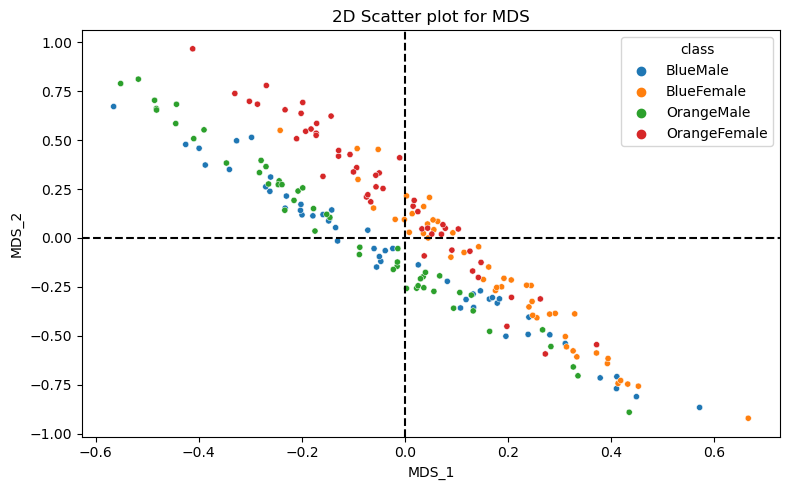

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='MDS_1',y='MDS_2',hue='class',data=crabs_mdscale,s=20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.title(f'2D Scatter plot for MDS')
plt.tight_layout()
plt.show()

In [16]:
mds = MDS(n_components=3,n_init=50,metric=True)
crabs_mds = mds.fit_transform(crabs_mdscale[features])
crabs_mdscale[['MDS_1','MDS_2','MDS_3']]=crabs_mds
print(f'The Mean Square Error (MSE) is: {mds.stress_.round(4)}')
crabs_mdscale.head()

The Mean Square Error (MSE) is: 1.8071


,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Max Width,Body Depth,class,MDS_1,MDS_2,MDS_3
index,,,,,,,,,,,
1,Blue,Male,0.057,0.015,0.043,0.051,0.058,BlueMale,-0.431,-0.407,0.850
2,Blue,Male,0.101,0.088,0.103,0.099,0.084,BlueMale,-0.366,-0.332,0.782
3,Blue,Male,0.126,0.095,0.131,0.141,0.103,BlueMale,-0.344,-0.291,0.744
4,Blue,Male,0.151,0.102,0.164,0.160,0.135,BlueMale,-0.316,-0.269,0.704
5,Blue,Male,0.164,0.109,0.170,0.157,0.135,BlueMale,-0.286,-0.294,0.696


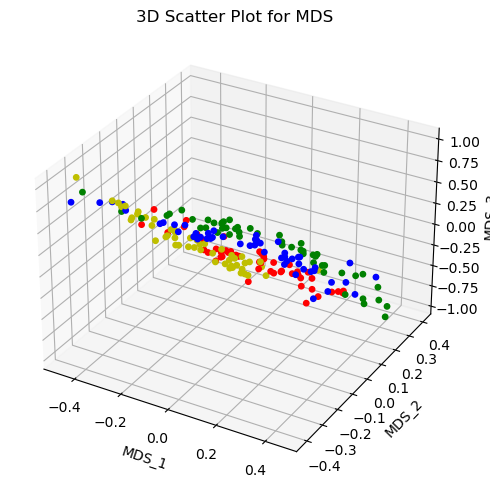

In [17]:
crabs_col = {'BlueMale': 'b', 'BlueFemale': 'y', 'OrangeMale': 'g', 'OrangeFemale': 'r'}

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(crabs_mdscale.MDS_1, crabs_mdscale.MDS_2, crabs_mdscale.MDS_3, c=crabs_mdscale['class'].map(crabs_col),
           s=15,depthshade=False)
ax.set_xlabel('MDS_1')
ax.set_ylabel('MDS_2')
ax.set_zlabel('MDS_3')
ax.set_title('3D Scatter Plot for MDS')
plt.tight_layout()
plt.show()

## ISOMAP

##### note:
- Parameter_1: **(n_neighbors/radius)** number of neighbors or all points in a fixed radius(use euclidean distance)
- Parameter_2: **(n_components)** value N for the number of target dimensions

In [20]:
features = ["Frontal Lobe","Rear Width","Carapace Midline","Max Width","Body Depth"]
#then we have to ensure that all variables have same range
crabs_isoscale = crabs_data.copy()
crabs_isoscale[features]=MinMaxScaler().fit_transform(crabs_data[features])
crabs_isoscale.describe().T

,count,mean,std,min,25%,50%,75%,max
Frontal Lobe,200.0,0.527,0.220,0.0,0.358,0.525,0.682,1.0
Rear Width,200.0,0.455,0.188,0.0,0.328,0.460,0.569,1.0
Carapace Midline,200.0,0.529,0.216,0.0,0.382,0.529,0.685,1.0
Max Width,200.0,0.515,0.210,0.0,0.384,0.525,0.664,1.0
Body Depth,200.0,0.512,0.221,0.0,0.342,0.503,0.677,1.0


Here the minimum for all variables are 0, maximum is 1. So the scaling worked correctly.

In [25]:
isomap = Isomap(n_components=2,n_neighbors=15)
crabs_iso = isomap.fit_transform(crabs_isoscale[features])
crabs_isoscale[['ISOMAP_1','ISOMAP_2']]=crabs_iso
print(f'The Reconstruction Error is: {isomap.reconstruction_error().round(4)}')
crabs_isoscale.head()

The Reconstruction Error is: 0.0075


,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Max Width,Body Depth,class,ISOMAP_1,ISOMAP_2
index,,,,,,,,,,
1,Blue,Male,0.057,0.015,0.043,0.051,0.058,BlueMale,1.056,-0.096
2,Blue,Male,0.101,0.088,0.103,0.099,0.084,BlueMale,0.951,-0.081
3,Blue,Male,0.126,0.095,0.131,0.141,0.103,BlueMale,0.903,-0.067
4,Blue,Male,0.151,0.102,0.164,0.160,0.135,BlueMale,0.859,-0.075
5,Blue,Male,0.164,0.109,0.170,0.157,0.135,BlueMale,0.848,-0.077


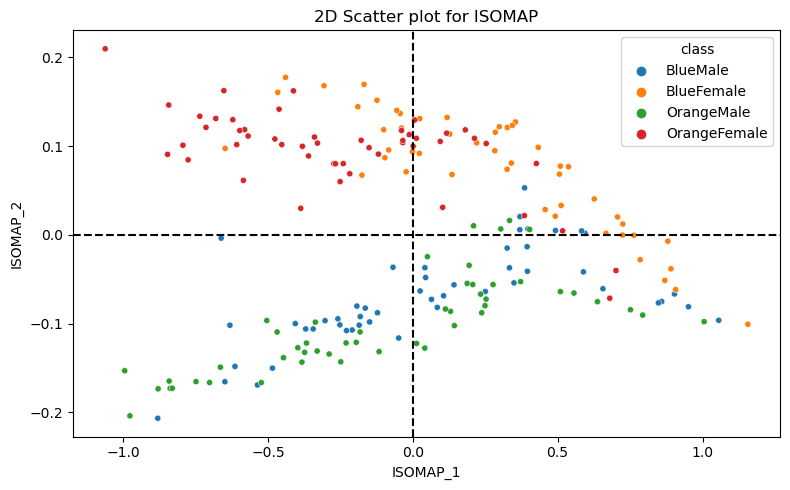

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='ISOMAP_1',y='ISOMAP_2',hue='class',data=crabs_isoscale,s=20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.title(f'2D Scatter plot for ISOMAP')
plt.tight_layout()
plt.show()

In [27]:
isomap = Isomap(n_components=3,n_neighbors=15)
crabs_iso = isomap.fit_transform(crabs_isoscale[features])
crabs_isoscale[['ISOMAP_1','ISOMAP_2','ISOMAP_3']]=crabs_iso
print(f'The Reconstruction Error is: {isomap.reconstruction_error().round(4)}')
crabs_isoscale.head()

The Reconstruction Error is: 0.0055


,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Max Width,Body Depth,class,ISOMAP_1,ISOMAP_2,ISOMAP_3
index,,,,,,,,,,,
1,Blue,Male,0.057,0.015,0.043,0.051,0.058,BlueMale,1.056,-0.096,0.127
2,Blue,Male,0.101,0.088,0.103,0.099,0.084,BlueMale,0.951,-0.081,0.049
3,Blue,Male,0.126,0.095,0.131,0.141,0.103,BlueMale,0.903,-0.067,0.035
4,Blue,Male,0.151,0.102,0.164,0.160,0.135,BlueMale,0.859,-0.075,0.043
5,Blue,Male,0.164,0.109,0.170,0.157,0.135,BlueMale,0.848,-0.077,0.052


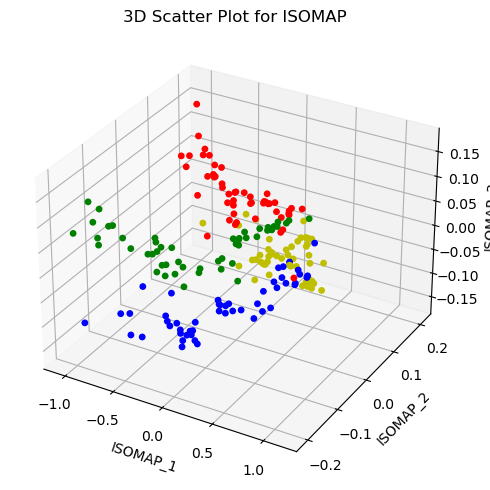

In [29]:
crabs_col = {'BlueMale': 'b', 'BlueFemale': 'y', 'OrangeMale': 'g', 'OrangeFemale': 'r'}

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(crabs_isoscale.ISOMAP_1, crabs_isoscale.ISOMAP_2, crabs_isoscale.ISOMAP_3, 
           c=crabs_isoscale['class'].map(crabs_col), s=15,depthshade=False)
ax.set_xlabel('ISOMAP_1')
ax.set_ylabel('ISOMAP_2')
ax.set_zlabel('ISOMAP_3')
ax.set_title('3D Scatter Plot for ISOMAP')
plt.tight_layout()
plt.show()